## Diseño de amplificadores de RF

Este documento se basa en el trabajo de Linvill [^1], Stern  [^2] y otros  [^6],[^8],[^11],[^12].

Las ecuaciones que figuran en el texto de este informe son aplicables a las configuraciones de emisor común, base común o colector común, utilizando el conjunto de parámetros correspondiente (parámetros de emisor común, base común o colector común). 
Si bien se desarrolla principalmente el diseño de circuitos con transistores bipolares convencionales, la teoría de la red de dos puertos tiene la ventaja de ser aplicable a cualquier red activa lineal. 
Por lo tanto, el mismo enfoque de diseño y ecuaciones pueden usarse con los transistores de efecto de campo[^7],[^9], los circuitos integrados[^10] o cualquier otro dispositivo que pueda describirse como una red activa lineal de dos puertos.

## Consideranciones generales de diseño 

El diseño del amplificador sintonizado de  pequeña señal de RF generalmente se basa en el requisito de una ganancia de potencia específica a una frecuencia dada. 
Otros objetivos de diseño pueden incluir ancho de banda, estabilidad, aislamiento de entrada-salida y bajo rendimiento de ruido. 
Después de seleccionar un tipo de circuito básico, se pueden resolver las ecuaciones de diseño aplicables.
Los circuitos se pueden clasificar de acuerdo con la retroalimentación (neutralización, unilateralización o sin retroalimentación), y la coincidencia en los terminales del transistor (las admisiones del circuito coinciden o no con las entradas y salidas de los transistores). 
Se discutirá cada una de estas categorías de circuitos, incluidas las ecuaciones de diseño aplicables y las consideraciones que conducen a la selección de una configuración particular.

### ESTABILIDAD

#### Linvill
Un factor importante en el diseño general es la estabilidad potencial del transistor. 
Esto puede determinarse calculando el factor de estabilidad de Linvill[1] $C$, usando la siguiente expresión:

$$ C = \frac{ |y_{12} \cdot y_{21}|}{2 \cdot \Re(y_{11}) \cdot \Re(y_{22})- \Re(y_{12} \cdot y_{21})}$$

Cuando $C$ es menor que 1, el transistor es incondicionalmente estable. 
Cuando $C$ es mayor que 1, el transistor es potencialmente inestable.

El factor $C$ es una prueba de estabilidad bajo una hipotética condición del peor de los casos; es decir, con los terminales del transistor de entrada y salida en circuito abierto. 

Sin retroalimentación externa, un transistor incondicionalmente estable no oscilará con ninguna combinación de fuente y carga. 
Si un transistor es potencialmente inestable, ciertas combinaciones de fuente y carga producirán oscilaciones.
Aunque el factor $C$ puede usarse para determinar la estabilidad potencial de un transistor, las condiciones de fuente de circuito abierto y carga que se supone en la prueba del factor $C$ no son aplicables a un amplificador práctico. 
Por consiguiente, también es deseable calcular la estabilidad relativa de los circuitos amplificadores reales, y Stern[2] ha definido un factor de estabilidad $k$ para este propósito. 

#### Stern
El factor $k$ es similar al factor $C$, excepto que también tiene en cuenta la fuente finita y las admitancias de carga conectadas al transistor. La expresión para $k$ es:

$$ k = \frac{2 \cdot ( g_{11} + g_{s} ) \cdot (g_{22} + g_{L} )}{ |y_{12} \cdot y_{21}| + \Re(y_{12} \cdot y_{21})}$$

Si $k$ es mayor que uno, el circuito será estable. 
Si $k$ es menor que uno, el circuito será potencialmente inestable y muy probablemente oscilará a alguna frecuencia.
Tenga en cuenta que el factor $C$ simplemente predice la estabilidad potencial de un transistor con una fuente y carga de circuito abierto, mientras que el factor $k$ proporciona un cálculo de estabilidad para un circuito específico.
Las consideraciones de estabilidad se discutirán más adelante en las descripciones de cada tipo de circuito básico a seguir.

### Ecuaciones generales del diseño 

Existen varias ecuaciones de diseño que son aplicables a la mayoría de los tipos de amplificadores. Estas ecuaciones serán discutidas primero. A continuación, se incluirán descripciones de tipos de amplificadores específicos, y cada uno contendrá ecuaciones de diseño adicionales aplicables a ese amplificador en particular.

#### Ganacia de potencia

La expresión general para ganancia de potencia es:

$$ G = \frac{ |y_{21}|^2 \cdot \Re(y_{L}) }{ |y_{22} + y_{L}|^2  \cdot  \Re(y_{11} - \frac{ y_{12}\cdot y_{21}}{y_{22} + y_{L} })}$$


La ecuación 3 se aplica a circuitos sin retroalimentación externa. 

![algo](paralelo.png)

También se puede usar con circuitos que tienen retroalimentación externa si los parámetros compuestos y del transistor y la red de retroalimentación son sustituidos por los parámetros del transistor y en la ecuación. Los parámetros compuestos y se determinan considerando que el transistor y la red de retroalimentación son dos "cajas negras" en paralelo:

$$ y_{11c} = y_{11t} + y_{11f} $$
$$ y_{12c} = y_{12t} + y_{12f} $$
$$ y_{21c} = y_{21t} + y_{21f} $$
$$ y_{22c} = y_{22t} + y_{22f} $$


Donde: 
$y_{11c}$, $y_{12c}$, $y_{21c}$, $y_{22c}$ son los parámetros compuestos y de la combinación paralela de transistor y red de retroalimentación. 
$y_{11t}$, $y_{12t}$, $y_{21t}$, $y_{22t}$ son los parámetros y del transistor. 
$y_{11f}$, $y_{12f}$, $y_{21f}$, $y_{22f}$ son los parámetros y de la red de retroalimentación.

Tenga en cuenta que, dado que este enfoque trata la combinación del transistor y la red de retroalimentación como una única "caja negra" con $y_{11c}$, $y_{12c}$, $y_{21c}$, $y_{22c}$ como sus parámetros y, los parámetros compuestos y pueden ser sustituidos, en cualquiera de las ecuaciones de diseño aplicables a un análisis lineal activo de dos puertos.


Los amplificadores neutralizados y unilateralizados son casos especiales de este concepto general, y las ecuaciones asociadas con esos casos especiales se darán más adelante.

La ecuación 3 proporciona una solución para la ganancia de potencia de la red activa lineal (transistor) solamente. Las redes de entrada y salida se consideran parte de la fuente y la carga, respectivamente. Por lo tanto, deben tenerse en cuenta dos puntos importantes:

1. La ganancia de potencia calculada a partir de la ecuación 3 no tendrá en cuenta las pérdidas de red. La pérdida de la red de entrada reduce la potencia entregada al transistor. La potencia perdida en la red de salida se calcula como salida de potencia útil, ya que la admitancia de carga $YL$ es la combinación de la red de salida y su carga.

2. La ganancia de potencia es independiente de la fuente admitida. Una falta de coincidencia de entrada da como resultado que se entregue menos potencia de entrada al transistor. En consecuencia, tenga en cuenta que la ecuación 3 no contiene el término $Ys$.

La ganancia de potencia de un transistor junto con sus redes de entrada y salida asociadas se puede calcular midiendo las pérdidas de la red de entrada y salida, y restándolas de la ganancia de potencia calculada con la ecuación 3.

En algunos casos, puede ser conveniente incluir los efectos de adaptación de entrada en cálculos de ganancia de potencia. Un término conveniente es ganancia de transductor $G_T$, definida como potencia de salida entregada a una carga por el transistor, dividida por la potencia de entrada máxima disponible desde la fuente.

La ecuación para la ganancia del transductor es:

$$ G_T = \frac{4 \cdot |y_{21}|^2 \cdot \Re(Y_{s}) \cdot \Re(Y_{L}) }{ |(y_{11} + y_{s})  \cdot (y_{22} + y_{L}) - (y_{12} + y_{21})|^2}$$

En esta ecuación, YL es la admitancia de carga de transistor compuesta, compuesta tanto de la red de salida como de su carga, e Ys es la admitancia de fuente de transistor compuesta, compuesta por la red de entrada y su fuente. Por lo tanto, la ganancia del transductor incluye los efectos del grado de coincidencia de admitancia en los terminales de entrada del transistor, pero no tiene en cuenta las pérdidas de la red de entrada y salida.
Como en la ecuación 3, los parámetros y compuestos de una combinación de red de retroalimentación de transistor pueden ser sustituidos por los parámetros y del transistor cuando se usa dicha combinación.
La ganancia máxima disponible (MAG) es una figura de mérito de transistor de uso frecuente. El MAG es la ganancia de potencia teórica de un transistor con su admitancia de transferencia inversa $y_{12}$ igual a cero, y sus admitancias de fuente y carga coinciden de forma conjugada con $y_{12}$ e $y_{22}$, respectivamente.
Si $y_{12} = 0$, el transistor exhibe una admitancia de entrada igual a y11 y una admitancia de salida igual a y22. La ecuación para MAG, por lo tanto, se obtiene resolviendo la expresión de ganancia de potencia general, ecuación 3, con las condiciones

$$y_{12} = 0$$
$$y_{s}  = y_{11}*$$
$$y_{L}  = y_{22}*$$

donde $*$ denota conjugado, lo que produce:

$$ MAG = \frac{ |y_{21}|^2  }{ 4 \cdot \Re(y_{11}) \cdot \Re(y_{22})}$$

MAG es una figura de mérito solamente, ya que es físicamente imposible reducir $y_{12}$ a cero sin cambiar los otros parámetros del transistor. 
Se puede usar una red de retroalimentación externa para lograr un compuesto $y_{12}$ de cero, pero luego los otros parámetros compuestos también se modificarán de acuerdo con las relaciones dadas en la discusión del transistor compuesto - red de retroalimentación “caja negra”.


### Admitancia de entrada y de salida

La expresión para la admitancia de entrada de un transistor es:

$$ y_{in}  = y_{11} - \frac{ y_{12}\cdot y_{21}}{y_{22} + y_{L} } $$

La expresión para la admitancia de salida de un transistor es:


$$ y_{out} = y_{22} - \frac{ y_{12}\cdot y_{21}}{y_{11} + y_{s} } $$

Cuando el parámetro de retroalimentación $y_{12}$ no es cero, $y_{in}$ depende de la admisión de carga e $y_{out}$ depende de la admisión de fuente.

### Estabilidad del amplificador
Una de las principales consideraciones en el diseño del amplificador de RF es la estabilidad. La estabilidad de un diseño final se puede garantizar al incluir cálculos de estabilidad y considerar la estabilidad en todas las decisiones de diseño relacionadas con la realimentación y la fuente de transistores y las admisiones de carga.
La estabilidad potencial del transistor debe calcularse primero utilizando la ecuación 1.
Las diversas alternativas relacionadas con la coincidencia de entrada-salida y la neutralización-unilateralización se discutirán ahora tanto para el transistor incondicionalmente estable como para el transistor potencialmente inestable.

#### El transistor incondicionalmente estable
Cuando el factor de estabilidad de Linvill del transistor determinado por la ecuación 1 es menor que uno, el transistor es incondicionalmente estable. Las oscilaciones no ocurrirán usando ninguna combinación de fuentes y admisiones de carga sin retroalimentación externa. Por lo tanto, la estabilidad se elimina como un factor en el resto del diseño, y es posible una libertad total con respecto a la coincidencia y neutralización para optimizar el amplificador para otros requisitos de rendimiento.

#### AMPLIFICADORES SIN REALIMENTACIÓN
El amplificador sin realimentación es una opción lógica para el transistor incondicionalmente estable en muchas aplicaciones, ya que puede ofrecer las ventajas de menos componentes y un procedimiento de sintonización simple.
Las admitancia de fuente y carga pueden seleccionarse para obtener la máxima ganancia y/o cualquier número de otros requisitos. La ganancia de potencia y la ganancia del transductor pueden calcularse utilizando las ecuaciones 3 y 5, respectivamente; Las admitancias de entrada y salida pueden calcularse utilizando las ecuaciones 8 y 9, respectivamente.

El factor de estabilidad del amplificador se puede calcular utilizando la ecuación 2. Si bien la estabilidad del amplificador se aseguró desde el principio mediante el uso de un transistor incondicionalmente estable, el diseñador aún puede desear realizar este cálculo para proporcionar una idea del peligro de inestabilidad en condiciones ambientales adversas. variaciones de fuente y carga, etc.

### $G_{max}$

$G_{max}$, la ganancia de transductor más alta posible sin retroalimentación externa, forma un caso especial del amplificador sin retroalimentación.
Las admisiones de fuente y carga requeridas para lograr $G_{max}$ pueden calcularse a partir de lo siguiente:

$$ g_{s}  = \frac{1}{2 \cdot  \Re(y_{22})} \cdot  \sqrt{ [2 \cdot \Re(y_{11}) \cdot \Re(y_{22}) - \Re(y_{12} \cdot y_{21})]^2 - |y_{12} \cdot y_{21}|^2 } $$

$$ b_{s}  = - \Im(y_{11}) + \frac{\Im(y_{12} \cdot y_{21})}{2\cdot  \Re(y_{22})} $$

$$ g_{l}  = \frac{1}{2 \cdot  \Re(y_{11})} \cdot  \sqrt{ [2 \cdot \Re(y_{11}) \cdot \Re(y_{22}) - \Re(y_{12} \cdot y_{21})]^2 - |y_{12} \cdot y_{21}|^2 } $$

$$ b_{s}  = - \Im(y_{22}) + \frac{\Im(y_{12} \cdot y_{21})}{2\cdot  \Re(y_{11})} $$

Por lo tanto, si se desea la ganancia de potencia máxima posible sin retroalimentación para un amplificador, las ecuaciones 10, 11 12 y 13 se usan para calcular Ysy YL.
La magnitud de Gmax puede calcularse a partir de las siguientes expresiones:

$$G_{max} = \frac{|y_{21}|^2}{ [2 \cdot \Re(y_{11}) \cdot \Re(y_{22}) - \Re(y_{12} \cdot y_{21})] + \sqrt{ [2 \cdot \Re(y_{11}) \cdot \Re(y_{22}) - \Re(y_{12} \cdot y_{21})]^2 - |y_{12} \cdot y_{21}|^2 }  }$$

Las ecuaciones 10, 11, 12 y 13 se pueden obtener diferenciando la ecuación 5 con respecto a $g_s$, $b_s$, $g_L$ y $b_L$, y establecer las cuatro derivadas iguales a cero. 
Los $g_s$, $b_s$, $g_L$ y $b_L$ así calculados pueden sustituirse en la ecuación 5 para obtener la expresión para Gmax, ecuación 14.

### EL AMPLIFICADOR UNILATERALIZADO
La unilateralización consiste en emplear una red de retroalimentación externa para lograr un compuesto $y_{12}$ de cero.
Si bien la unilateralización se usa con mayor frecuencia para lograr la estabilidad con un transistor potencialmente inestable, otras consideraciones de circuito también pueden justificar el uso de la unilateralización con el transistor incondicionalmente estable. 
Por ejemplo, el aislamiento de entrada-salida que ofrece la unilateralización puede ser deseable en un diseño particular.
Las ecuaciones de diseño para el caso unilateralizado se obtienen calculando primero los parámetros compuestos y de la combinación de transistor - red de realimentación y luego sustituyendo los parámetros compuestos en las ecuaciones generales.
Refiriéndose a la discusión sobre los parámetros y compuestos y estableciendo la condición básica de que $y_{12c}$ debe ser igual a cero, se pueden calcular los otros parámetros y compuestos. Suponiendo que se está utilizando una red de retroalimentación pasiva, entonces

$$y_{11f} = y_{22f} = - y_{12f} = - y_{21f}$$

$$y_{12c} = 0$$ 

$$y_{12t} + y_{12f} = 0$$

$$y_{12t} = -y_{12f} = y_{11f}  = y_{22f} = - y_{21f}$$ 

Resultando:

$$ y_{11c} = y_{11t} + y_{12t} $$
$$ y_{22c} = y_{22t} + y_{12t} $$
$$ y_{12c} = y_{12t} - y_{12t} = 0 $$
$$ y_{21c} = y_{21t} - y_{12t} $$

Para un transistor unilateral

$$ y_{in}  = y_{11t} + y_{12t} $$
$$ y_{out}  = y_{22t}+ y_{12t} $$

Ganancia de potencia unilateralizada, expresión general:

$$ G_{PU} = \frac{|y_{21t} - y_{12t}|^2  \cdot \Re(y_{L}) }{ |y_{L} + y_{22t} + y_{12t}|^2 \cdot \Re(y_{11t}) }$$


Ganancia de transducción unilateral:

$$ G_{U} = \frac{|y_{21t} - y_{12t}|^2  }{ 4 \cdot \Re(y_{11t} + y_{12t}) \cdot \Re(y_{22t} + y_{12t}) }$$

Ganancia de transductor unilateral

$$ G_{U} = \frac{4 \cdot \Re(y_{s}) \cdot \Re(y_{L}) \cdot |y_{21t} - y_{12t}|^2  }{| (y_{11t} + y_{12t} + y_{s}) \cdot (y_{22t} + y_{12t} + y_{L})|^2}$$



Tenga en cuenta que las ecuaciones 15, 16, 17, 18 y 19, se dan enteramente en términos de los parámetros del transistor y, no los de la retroalimentación red o el compuesto.

Otro beneficio de la unilateralización es el aislamiento de entrada-salida. 
Como se puede ver en las ecuaciones 15 y 16, YIN es completamente independiente de YL, e YOUT es igualmente independiente de Ys. 
En un sentido práctico, esto significa que en un amplificador de una o varias etapas que utiliza etapas unilateralizadas, la sintonización de cualquier red no afectará la sintonización en otras partes del circuito. Por lo tanto, se puede eliminar la tarea problemática de tener que volver a alcanzar el pico de un amplificador completo después de un cambio en la sintonización en un solo punto.

#### NEUTRALIZACIÓN 
La neutralización consiste en emplear una red de retroalimentación para reducir $y_{12}$ a algún valor distinto de cero. 
La neutralización se usa generalmente para los mismos fines que la unilateralización, pero proporciona algo menos que la cancelación ideal del parámetro de retroalimentación del transistor que logra la unilateralización. 
Un ejemplo típico de neutralización podría ser una red de retroalimentación que proporciona un compuesto $b_{12}$ de cero mientras que tiene un efecto insignificante en el transistor $g_{12}$.
Las ecuaciones para un caso neutralizado particular se desarrollarían de la misma manera que para el caso unilateralizado. 
Como hay un número infinito de posibilidades, aquí no se darán ecuaciones específicas.
Esto completa la discusión del diseño con el transistor incondicionalmente estable. Ahora se considerará el transistor potencialmente inestable.

### EL TRANSISTOR POTENCIALMENTE INESTABLE
Cuando el factor de estabilidad de Linvill del transistor determinado por la ecuación 1 es mayor que uno, el transistor es potencialmente inestable. 
Ciertas combinaciones de admisiones de fuente y carga causarán oscilaciones si no se utiliza realimentación. 
Al diseñar con el transistor potencialmente inestable, se deben tomar medidas para asegurar que el amplificador sea estable.
La estabilidad generalmente se logra mediante uno o ambos métodos:

1. utilizando una red de retroalimentación que reduce el parametro $y_{12}$ a un valor que asegure la estabilidad.
2. Elegir una fuente y una combinación de admitancia de carga que proporciona estabilidad.

Una discusión de estos métodos básicos se da a continuación.

### Uso de realimentacion para lograr la estabilidad 

Se puede utilizar la unilateralización o la neutralización para lograr la estabilidad. 
Si se utiliza la unilateralización, la combinación de red transistor-realimentación será incondicionalmente estable. 

Esto puede verificarse calculando el factor de estabilidad de Linvill de la combinación. Como $y_{12c} = 0$, el numerador en la ecuación 1 sería cero.
Con la estabilidad así asegurada, el resto del diseño se puede hacer para satisfacer otros requisitos del amplificador. 

Después de que la unilateralización haya convertido el transistor potencialmente inestable en una combinación incondicionalmente estable, todos los demás aspectos del diseño son idénticos al caso unilateralizado con el transistor incondicionalmente estable. Las ganancias de potencia y las admitancias de entrada y salida se pueden calcular usando las ecuaciones 15 a 19.

Si se usa la neutralización para lograr la estabilidad, el factor de estabilidad de Linvill se puede usar para calcular la estabilidad potencial de cualquier combinación de red de transistor-neutralización. Como en este caso $y_{12c}  \ne  0$, C tendrá un valor distinto de cero.

Después de que se haya logrado la estabilidad incondicional de la combinación de red de neutralización de transistores, el diseño puede completarse tratando la combinación como un transistor incondicionalmente estable y procediendo con el caso del transistor incondicionalmente estable en un amplificador sin realimentación. Las ganancias de potencia, las admitancias de entrada y salida, y el factor de estabilidad del circuito pueden calcularse utilizando los parámetros compuestos de la combinación en las ecuaciones 2, 3, 5, 8 y 9.




BIBLIOGRAPHY

[^1] : 'Transistors and Active Circuits', by Linvill and Gibbons, McGraw-Hill, 1961.

[^2] : 'Stability and Power Gain of Tuned Transistor Amplifiers', by Arthur P. Stern, Proc. IRE, March, 1957.

[^3] : 'Using Linvill Techniques for RF Amplifiers', MotorolaSemiconductor Products, Inc., Application Note 166.

[^4]: 'High-Gain, High-Frequency Amplifiers,” by Peter M.Norris, Electro-Technology, January, 1966.

[^5]: 'Linvill Technique Speeds High Frequency AmplifierDesign,” by John Lauchner and Marvin Silverstein, Electronic Design, April 12, 1966.

[^6]: 'The Design of Alignable Transistor Amplifiers,” by JFGibbons, Stanford University Technical Report No. 106, May 7, 1956.

[^7]: 'Field Effect Transistor RF Amplifier Design Techniques,” Motorola Semiconductor Products, Inc., Application Note 423.

[^8]: 'Circuit Design and Characterization of Transistors byMeans of Three-Part Scattering Parameters,” by George E. Bodway, The Microwave Journal, May, 1968.

[^9]: 'Small-Signal RF Design with Dual-Gate MOSFET's,”Motorola Semiconductor Products, Inc. Application Note 478A.

[^10]: 'A High Gain Integrated Circuit RF-IF Amplifier withWide Range AGC', Motorola Semiconductor Products, Inc. Application Note 513.

[^11]: 'S Parameter Design', Hewlett-Packard Company,Palo Alto, California, Application Note 154.

[^12]: 'S Parameters', Hewlett-Packard Company, Palo Alto,California, Application Note 95.

[^13]: 'Staying Stable with S Parameters', by Roy Hejhall,Motorola Monitor, Vol. 7, No. 2.


BIBLIOGRAPHY
1. “Transistors and Active Circuits,” by Linvill and Gibbons, McGraw-Hill, 1961.
2. “Stability and Power Gain of Tuned Transistor Amplifiers,” by Arthur P. Stern, Proc. IRE, March, 1957.
3. “Using Linvill Techniques for RF Amplifiers,” MotorolaSemiconductor Products, Inc., Application Note 166.
4. “High-Gain, High-Frequency Amplifiers,” by Peter M.Norris, Electro-Technology, January, 1966.
5. “Linvill Technique Speeds High Frequency AmplifierDesign,” by John Lauchner and Marvin Silverstein, Electronic Design, April 12, 1966.
6. “The Design of Alignable Transistor Amplifiers,” by JFGibbons, Stanford University Technical Report No. 106, May 7, 1956.
7. “Field Effect Transistor RF Amplifier Design Techniques,” Motorola Semiconductor Products, Inc., Application Note 423.
8. “Circuit Design and Characterization of Transistors byMeans of Three-Part Scattering Parameters,” by George E. Bodway, The Microwave Journal, May, 1968.
9. “Small-Signal RF Design with Dual-Gate MOSFET's,”Motorola Semiconductor Products, Inc. Application Note 478A.
10. “A High Gain Integrated Circuit RF-IF Amplifier withWide Range AGC,” Motorola Semiconductor Products, Inc. Application Note 513.
11. “S Parameter Design,” Hewlett-Packard Company,Palo Alto, California, Application Note 154.
12. “S Parameters,” Hewlett-Packard Company, Palo Alto,California, Application Note 95.
13. “Staying Stable with S Parameters,” by Roy Hejhall,Motorola Monitor, Vol. 7, No. 2.


In [1]:
import math
import cmath 
import numpy as np
import matplotlib.pyplot as plt
from skrf import Network, Frequency


from IPython.display import Image  
%matplotlib inline
params = {'legend.fontsize': 24,
          'figure.figsize': (10, 10),
         'axes.labelsize': 24,
         'axes.titlesize': 24,
         'xtick.labelsize':24,
         'ytick.labelsize':24}
plt.rcParams.update(params)




In [33]:
def Linvill(yt, printme= False):
    y11 = yt[0,0]
    y12 = yt[0,1]
    y21 = yt[1,0]
    y22 = yt[1,1]
    C = (abs(y12*y21))/(2*y11.real*y22.real-(y12*y21).real)
    if printme:
        print('###############  LINVILL   #####################')
        print( 'coeficiente de linvill C= {:4.2F}' .format(C))
        if C < 1:
            print( 'Es incondicionalmente estable')
        else :
            print( 'Es potencialmente inestable')
    return C

def Stern(yg, yl, yt, printme = False):
    y11 = yt[0,0]
    y12 = yt[0,1]
    y21 = yt[1,0]
    y22 = yt[1,1]
    K = (2*(y11.real+yg.real)*(y22.real+yl.real)) / (abs(y12*y21)+(y12*y21).real)
    if  printme:
        print('###############  STERN   #####################')
        print( 'coeficiente de stern K= {:4.2F}' .format(K))
        if K > 1:
            print( 'Estable')
        else :
            print( 'Inestable')
    return K

def Yini(yg, yl, yt, printme = False):
    y11 = yt[0,0]
    y12 = yt[0,1]
    y21 = yt[1,0]
    y22 = yt[1,1]
    yin  = y11 - (y21*y12)/(y22+yl)
    if printme:
        print( 'yin  = {0.real:4.3F} {0.imag:4.2E}' .format(yin) )
        print( 'rin  = {0.real:4.3F} ' .format(1/yin.real) )    
    return yin
    
def Youti(yg, yl, yt, printme = False):
    y11 = yt[0,0]
    y12 = yt[0,1]
    y21 = yt[1,0]
    y22 = yt[1,1]
    yout = y22 - (y21*y12)/(y11+yg)
    if printme:
        print( 'yout = {0.real:4.3F} {0.imag:4.2E}' .format(yout) )
        print( 'rout = {0.real:4.3F} ' .format(1/yout.real) )    
    return yout


def Gti(yg, yl, yt, printme = False):
    y11 = yt[0,0]
    y12 = yt[0,1]
    y21 = yt[1,0]
    y22 = yt[1,1]
    Gt = 4* abs(y21)**2 *yl.real *yg.real /abs((y11+yg)*(y22+yl)-y21*y12)**2
    if printme:
        print( 'Gt= {0.real:4.2F} ' .format((Gt)))
    return Gt



def neutraliza(yt,wo,n = 1):
    Cn = -yt[0,1].imag/wo*n
    y11 =  wo*Cn*1j
    y12 =  wo*Cn*1j/n
    y21 =  wo*Cn*1j/n
    y22 =  wo*Cn*1j/n**2
    yn  = np.matrix([[y11, y12],[ y21, y22]])
    # cuadripolo resultante
    ytn  = yt + yn
    print('cap=',Cn, 'n=', n)
    return (ytn,Cn)


def realimenta(yt,wo,yf):
    y11 =   yf
    y12 =  -yf
    y21 =  -yf
    y22 =   yf  
    yn  = np.matrix([[y11, y12],[ y21, y22]])
    # cuadripolo resultante
    ytn  = yt + yn
    return (ytn)

def printS(S1):
    s11 =   S1[0,0]
    s12 =   S1[0,1]
    s21 =   S1[1,0]
    s22 =   S1[1,1]
    print( 's11= |{:1.4f}|  ({:1.4f})' .format(abs(s11),np.angle(s11)*180/np.pi ))
    print( 's12= |{:1.4f}|  ({:1.4f})' .format(abs(s12),np.angle(s12)*180/np.pi ))
    print( 's21= |{:1.4f}|  ({:1.4f})' .format(abs(s21),np.angle(s21)*180/np.pi ))
    print( 's22= |{:1.4f}|  ({:1.4f})' .format(abs(s22),np.angle(s22)*180/np.pi ))

def printY(Y1,f):
    wo  = 2*np.pi*f
    y11 =   Y1[0,0]
    y12 =   Y1[0,1]
    y21 =   Y1[1,0]
    y22 =   Y1[1,1]
    print( 'y11= {0.real:1.4f}+  ({0.imag:1.4f})j' .format(y11) )
    print( 'y12= {0.real:1.4f}+  ({0.imag:1.4f})j' .format(y12) )
    print( 'y21= {0.real:1.4f}+  ({0.imag:1.4f})j' .format(y21) )
    print( 'y22= {0.real:1.4f}+  ({0.imag:1.4f})j' .format(y22) )
    print(' ')

    print( 'r11= {0.real:1.4F}' .format(1/y11.real) )
    print( 'c11= {0.real:1.4E}' .format(y11.imag/wo) )


    print( 'gm =  {0.real:1.4E}+  ({0.imag:1.4E})j' .format((y21)) )
    print( 'gr =  {0.real:1.4E}+  ({0.imag:1.4E})j' .format((y12)) )

    print( 'r22= {0.real:1.4F}' .format(1/y22.real) )
    print( 'c22= {0.real:1.4E}' .format(y22.imag/wo) )

   

In [34]:
NPNRF = Network('../modelos/SPAR/BFP460/BFP460_w_noise_VCE_2.0V_IC_4.0mA.s2p')

freq = Frequency(10,200,11,'mhz')


In [35]:
fo = np.arange(80e6,130e6,10e6)
wo = 2*np.pi*fo

for f in fo:
    print('Parametros S {}MHz (2V4mA):'.format(f/1e6))
    printS(NPNRF['{}Mhz'.format(f/1e6)].s[0])
    print(' ')



Parametros S 80.0MHz (2V4mA):
s11= |0.8904|  (-13.5000)
s12= |0.0168|  (82.5000)
s21= |13.3560|  (170.5000)
s22= |0.9809|  (-8.9000)
 
Parametros S 90.0MHz (2V4mA):
s11= |0.8883|  (-15.3000)
s12= |0.0188|  (81.9000)
s21= |13.3270|  (169.3000)
s22= |0.9781|  (-10.0000)
 
Parametros S 100.0MHz (2V4mA):
s11= |0.8855|  (-17.0000)
s12= |0.0208|  (80.4000)
s21= |13.2210|  (168.2000)
s22= |0.9754|  (-11.1000)
 
Parametros S 110.0MHz (2V4mA):
s11= |0.8840|  (-18.8000)
s12= |0.0229|  (79.4000)
s21= |13.2100|  (167.1000)
s22= |0.9721|  (-12.2000)
 
Parametros S 120.0MHz (2V4mA):
s11= |0.8808|  (-20.5000)
s12= |0.0249|  (78.7000)
s21= |13.1940|  (165.9000)
s22= |0.9689|  (-13.3000)
 


In [37]:
fo = np.arange(80e6,130e6,10e6)
wo = 2*np.pi*fo


for f in fo:
    print('Parametros Y {}MHz (2V4mA):'.format(f/1e6))
    printY(NPNRF['{}Mhz'.format(f/1e6)].y[0],f)
    print(' ')



Parametros Y 80.0MHz (2V4mA):
y11= 0.0011+  (0.0011)j
y12= -0.0000+  (-0.0002)j
y21= 0.1428+  (-0.0054)j
y22= 0.0001+  (0.0003)j
 
r11= 907.3360
c11= 2.1535E-12
gm =  1.4280E-01+  (-5.3772E-03)j
gr =  -4.9106E-07+  (-1.7974E-04)j
r22= 12078.3212
c22= 6.8806E-13
 
Parametros Y 90.0MHz (2V4mA):
y11= 0.0011+  (0.0012)j
y12= 0.0000+  (-0.0002)j
y21= 0.1430+  (-0.0060)j
y22= 0.0001+  (0.0004)j
 
r11= 891.5060
c11= 2.1959E-12
gm =  1.4297E-01+  (-5.9694E-03)j
gr =  7.3662E-07+  (-2.0186E-04)j
r22= 10968.0455
c22= 6.9107E-13
 
Parametros Y 100.0MHz (2V4mA):
y11= 0.0011+  (0.0014)j
y12= -0.0000+  (-0.0002)j
y21= 0.1422+  (-0.0063)j
y22= 0.0001+  (0.0004)j
 
r11= 887.9012
c11= 2.2186E-12
gm =  1.4223E-01+  (-6.3196E-03)j
gr =  -1.3453E-06+  (-2.2398E-04)j
r22= 13046.9358
c22= 7.1163E-13
 
Parametros Y 110.0MHz (2V4mA):
y11= 0.0011+  (0.0015)j
y12= -0.0000+  (-0.0002)j
y21= 0.1425+  (-0.0067)j
y22= 0.0001+  (0.0005)j
 
r11= 886.9258
c11= 2.2359E-12
gm =  1.4255E-01+  (-6.7305E-03)j
gr =  -1.7410

In [41]:
fo = np.arange(80e6,130e6,10e6)
wo = 2*np.pi*fo


for f in fo:
    #print('Linvill Y {}MHz (2V4mA):'.format(f/1e6))
    C = Linvill(NPNRF['{}Mhz'.format(f/1e6)].y[0])
    print('C({:1.1f} MHz)= {:1.2f}'.format(f/1e6,C))

C(80.0 MHz)= 21.07
C(90.0 MHz)= 22.15
C(100.0 MHz)= 17.92
C(110.0 MHz)= 16.96
C(120.0 MHz)= 16.53


C(80.0 MHz)= 1.01
C(90.0 MHz)= 1.02
C(100.0 MHz)= 1.03
C(110.0 MHz)= 1.05
C(120.0 MHz)= 1.06


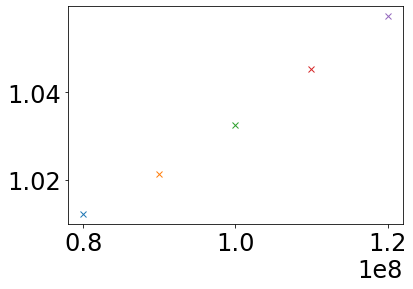

In [43]:
rf = 1.8e3
fo = np.arange(80e6,130e6,10e6)
wo = 2*np.pi*fo


for f in fo:
    #print('{:1.0f}mhz'.format(f/1e6))
    Y100 = NPNRF['{:1.0f}mhz'.format(f/1e6)].y[0]
    ytn  =  realimenta(Y100,2*np.pi*f,1/rf )
    C    = Linvill(ytn)
    print('C({:1.1f} MHz)= {:1.2f}'.format(f/1e6,C))
    plt.plot(f,C, 'x')
plt.show()    


K(80.0 MHz)= 96.62
K(90.0 MHz)= 76.47
K(100.0 MHz)= 61.76
K(110.0 MHz)= 50.02
K(120.0 MHz)= 42.40


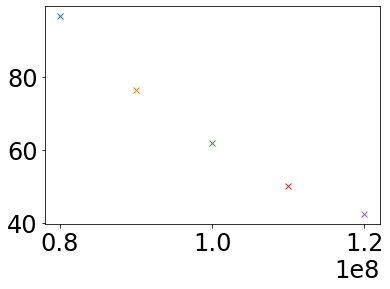

In [46]:
yg = (1/110 ) - 1.06E-02*1j
yl= (1/140 )  - 7.17E-03*1j

for f in np.arange(80e6,130e6,10e6):
    #print('{:1.0f}mhz'.format(f/1e6))
    Y100 = NPNRF['{:1.0f}mhz'.format(f/1e6)].y[0]
    ytn  =  realimenta(Y100,2*np.pi*f,1/1.2e3 )
    K    = Stern(yg, yl, ytn)
    print('K({:1.1f} MHz)= {:1.2f}'.format(f/1e6,K))
    plt.plot(f,K, 'x')
plt.show()    


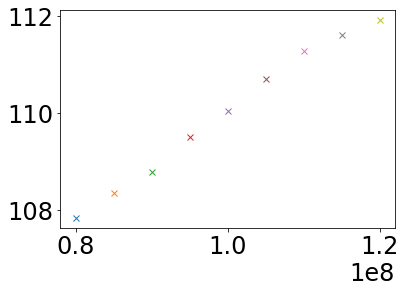

In [45]:
for f in np.arange(80e6,125e6,5e6):
    #print('{:1.0f}mhz'.format(f/1e6))
    Y100 = NPNRF['{:1.0f}mhz'.format(f/1e6)].y[0]
    ytn  =  realimenta(Y100,2*np.pi*f,1/1.2e3 )
    yin    = Yini(yg, yl, ytn)
    plt.plot(f,1/yin.real, 'x')
plt.show()   

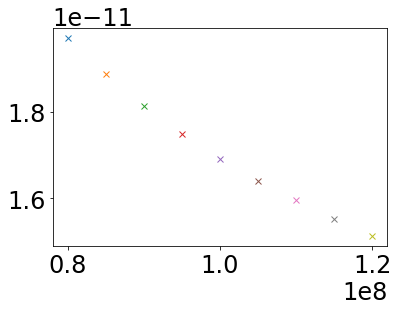

In [46]:
for f in np.arange(80e6,125e6,5e6):
    #print('{:1.0f}mhz'.format(f/1e6))
    w = 2*np.pi*f
    Y100 = NPNRF['{:1.0f}mhz'.format(f/1e6)].y[0]
    ytn  =  realimenta(Y100,w,1/1.2e3 )
    yin    = Yini(yg, yl, ytn)
    plt.plot(f,yin.imag/w, 'x')
plt.show()   

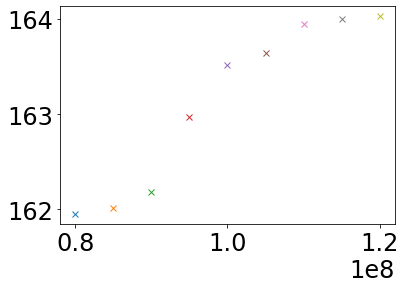

In [47]:
for f in np.arange(80e6,125e6,5e6):
    #print('{:1.0f}mhz'.format(f/1e6))
    w = 2*np.pi*f
    Y100 = NPNRF['{:1.0f}mhz'.format(f/1e6)].y[0]
    ytn  =  realimenta(Y100,w,1/1.2e3 )
    yout    = Youti(yg, yl, ytn)
    plt.plot(f,1/yout.real, 'x')
plt.show()   

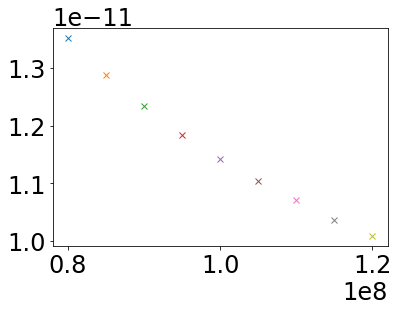

In [48]:
for f in np.arange(80e6,125e6,5e6):
    #print('{:1.0f}mhz'.format(f/1e6))
    w = 2*np.pi*f
    Y100 = NPNRF['{:1.0f}mhz'.format(f/1e6)].y[0]
    ytn  =  realimenta(Y100,w,1/1.2e3 )
    yout    = Youti(yg, yl, ytn)
    plt.plot(f,yout.imag/w, 'x')
plt.show() 